# Part 2 - Expriment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:

    a. how you will implement the experiment

    b. what statistical test(s) you will conduct to verify the significance of the
observation

    c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.


### Answers

I would choose the total cost reimbursed from each city toll as the key metric. If the total cost increase it will clearly means that number of trips to that city has increased. Bigger reimbursed cost means more success of the experiment.

I will implement this by collecting the data of toll cost, which will have following features. 
* Date on which driver paid the toll.
* Time at which drive paid the toll
* Total Ammount Paid by the driver.
* Direction of travel(can be broken into two features like to and from)

I will conduct hypothsis testing to see the significance.
Null Hypothesis :- There is no change in the pattern of drivers trips after the implementation of reimbursment model.
Alternate Hypothesis :- There is some change in the patterns of drivers trip after the implementation of reimbursement model.

I will visulize the experiment result of the trend, weekday, time of a day, direction, percentagae, etc. Then prepare a presentation to provide recommendations to the city operations team.

# Part 3 - Predictive Modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
    data for this analysis (a few sentences/plots describing your approach will suffice). What
    fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
    in their 6th month on the system. Discuss why you chose your approach, what
    alternatives you considered, and any concerns you have. How valid is your model?
    Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
    improve its long­term rider retention (again, a few sentences will suffice).


## Data Wrangling
### Data Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Data Load

In [2]:
path = '../ultimate_challenge/ultimate_data_challenge.json'
data = pd.read_json(path)

In [3]:
#Looking into the data
df = pd.DataFrame(data)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
# Setting new column names
New_Column_Names  = ['City', 'Trips_in_first_30_days', 'Signup_Date', 'Avg_Rating_of_Driver', 'Avg_surge', 
                     'Last_Trip_Date', 'Phone_Type', 'Surge_Pct', 'Ultimate_Black_User', 'Weekday_Pct', 
                     'Avg_Dist', 'Avg_Rating_by_Driver']
df.columns = New_Column_Names
df.head()

,City,Trips_in_first_30_days,Signup_Date,Avg_Rating_of_Driver,Avg_surge,Last_Trip_Date,Phone_Type,Surge_Pct,Ultimate_Black_User,Weekday_Pct,Avg_Dist,Avg_Rating_by_Driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   City                    50000 non-null  object 
 1   Trips_in_first_30_days  50000 non-null  int64  
 2   Signup_Date             50000 non-null  object 
 3   Avg_Rating_of_Driver    41878 non-null  float64
 4   Avg_surge               50000 non-null  float64
 5   Last_Trip_Date          50000 non-null  object 
 6   Phone_Type              49604 non-null  object 
 7   Surge_Pct               50000 non-null  float64
 8   Ultimate_Black_User     50000 non-null  bool   
 9   Weekday_Pct             50000 non-null  float64
 10  Avg_Dist                50000 non-null  float64
 11  Avg_Rating_by_Driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


At first glance we can see there are 3 columns with null values. Signup_Date and Last_Trip_Date is object type which should be Datetime type.

In [6]:
df.isnull().sum()

City                         0
Trips_in_first_30_days       0
Signup_Date                  0
Avg_Rating_of_Driver      8122
Avg_surge                    0
Last_Trip_Date               0
Phone_Type                 396
Surge_Pct                    0
Ultimate_Black_User          0
Weekday_Pct                  0
Avg_Dist                     0
Avg_Rating_by_Driver       201
dtype: int64

There are 3 columns with null values
* Avg_Rating_of_Drive
* Phone
* Avg_Rating_by_Driver

**Dealing with Null Values**


In [7]:
#Avg_Rating_of_Driver
df.Avg_Rating_of_Driver.unique()

array([4.7, 5. , 4.3, 4.6, 4.4, 3.5, nan, 4.5, 4. , 3.9, 4.9, 4.8, 2.5,
       3.7, 1. , 4.1, 4.2, 3. , 3.8, 2. , 2.7, 3.3, 2.8, 3.6, 3.4, 3.2,
       2.6, 3.1, 2.9, 1.7, 1.8, 1.5, 2.3, 1.9, 2.1, 2.4, 1.6, 2.2])

In [8]:
df['Avg_Rating_of_Driver'].fillna(round(df['Avg_Rating_of_Driver'].mean(), 1), inplace = True)

In [9]:
#Avg_Rating_by_Driver
df.Avg_Rating_by_Driver.unique()

array([5. , 4.9, 4. , 3. , 4.8, 4.7, 4.5, 4.2, nan, 4.4, 4.6, 3.7, 4.3,
       3.5, 2. , 3.8, 2.5, 4.1, 3.9, 1. , 3.3, 3.4, 3.6, 3.2, 2.3, 2.8,
       1.5, 2.7])

In [10]:
#Imputing the null values with mean rating
df['Avg_Rating_by_Driver'].fillna(round(df['Avg_Rating_by_Driver'].mean(), 1), inplace = True)

In [11]:
#Dropping rows with null values
df.dropna( inplace = True)

**Changing Column Types**

In [12]:
df['Signup_Date'] = pd.to_datetime(df['Signup_Date'])
df['Last_Trip_Date'] = pd.to_datetime(df['Last_Trip_Date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   City                    49604 non-null  object        
 1   Trips_in_first_30_days  49604 non-null  int64         
 2   Signup_Date             49604 non-null  datetime64[ns]
 3   Avg_Rating_of_Driver    49604 non-null  float64       
 4   Avg_surge               49604 non-null  float64       
 5   Last_Trip_Date          49604 non-null  datetime64[ns]
 6   Phone_Type              49604 non-null  object        
 7   Surge_Pct               49604 non-null  float64       
 8   Ultimate_Black_User     49604 non-null  bool          
 9   Weekday_Pct             49604 non-null  float64       
 10  Avg_Dist                49604 non-null  float64       
 11  Avg_Rating_by_Driver    49604 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

### Exploratory Data Analysis

In [14]:
df.describe()

,Trips_in_first_30_days,Avg_Rating_of_Driver,Avg_surge,Surge_Pct,Weekday_Pct,Avg_Dist,Avg_Rating_by_Driver
count,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000
mean,2.277256,4.601230,1.074991,8.875314,60.883832,5.785418,4.777949
std,3.793300,0.565228,0.222666,19.989018,37.086239,5.669709,0.446223
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.700000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.700000,100.000000,6.930000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [15]:
Categorical_Features = ['City', 'Phone_Type', 'Ultimate_Black_User']

In [16]:
df['Ultimate_Black_User'].unique()

array([ True, False])

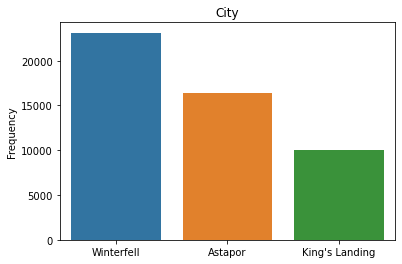

Winterfell        23125
Astapor           16413
King's Landing    10066
Name: City, dtype: int64


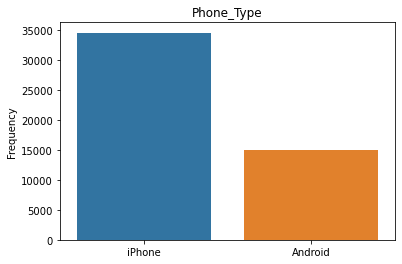

iPhone     34582
Android    15022
Name: Phone_Type, dtype: int64


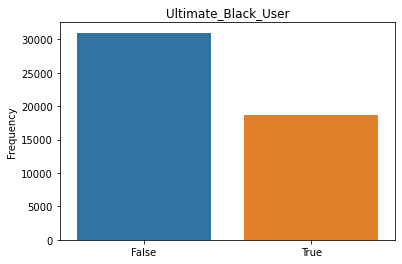

False    30992
True     18612
Name: Ultimate_Black_User, dtype: int64


In [17]:
for feature in Categorical_Features:
    sns.barplot(x = list(df[feature].value_counts().index), y = df[feature].value_counts())
    plt.title(feature)
    plt.ylabel('Frequency')
    plt.show()
    print(df[feature].value_counts())

In [18]:
numerical_features = ['Trips_in_first_30_days', 'Avg_Rating_of_Driver', 'Avg_surge','Surge_Pct',
                      'Weekday_Pct','Avg_Dist', 'Avg_Rating_by_Driver']

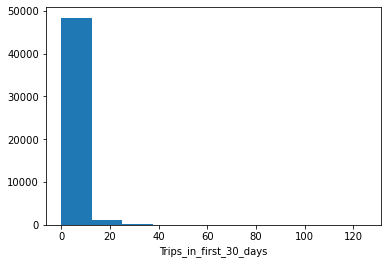

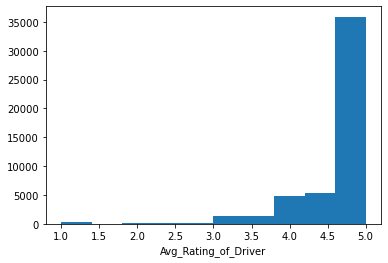

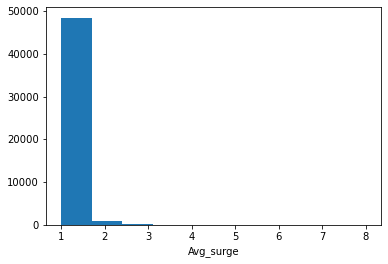

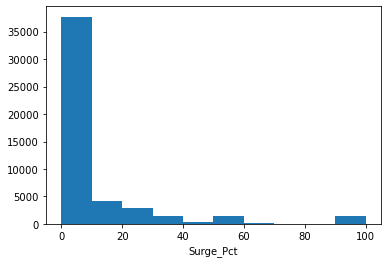

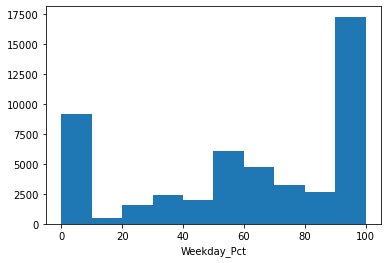

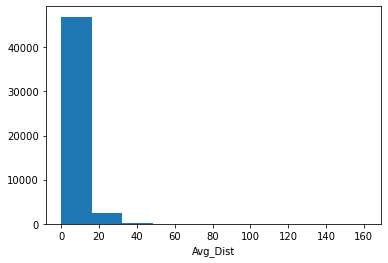

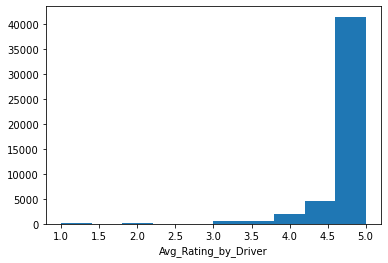

In [19]:
for feature in numerical_features:
    plt.hist(df[feature]);
    plt.xlabel(feature);
    plt.show()

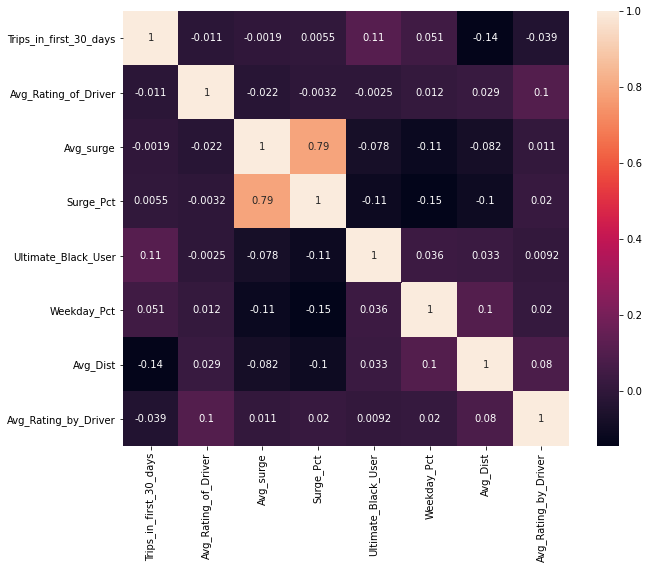

In [20]:
import seaborn as sns
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True);

There is a huge positive correlation between Surge_Pct and Avg_Surge but that makes only sense.

### Target Variable

In [21]:
df['Last_Trip_Date'].sort_values(ascending = False).head()

31587   2014-07-01
12085   2014-07-01
18814   2014-07-01
12139   2014-07-01
45516   2014-07-01
Name: Last_Trip_Date, dtype: datetime64[ns]

In [22]:
df['Active'] = (df['Last_Trip_Date'] > '2014-06-01')*1

In [23]:
df['Active'].value_counts()

0    31424
1    18180
Name: Active, dtype: int64

In [24]:
print('% of drivers retained: ', (18180/49604)*100)

% of drivers retained:  36.65027013950488


### Data Modeling

In [25]:
# Drop datetime features
df.drop(['Signup_Date', 'Last_Trip_Date'], axis=1, inplace=True)

In [26]:
df.head()

,City,Trips_in_first_30_days,Avg_Rating_of_Driver,Avg_surge,Phone_Type,Surge_Pct,Ultimate_Black_User,Weekday_Pct,Avg_Dist,Avg_Rating_by_Driver,Active
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0


In [27]:
# Creating dummy variables for categorical features
DF_New = pd.get_dummies(df, columns = ['City', 'Phone_Type', 'Ultimate_Black_User'], drop_first=True)

#### Train Test Split

In [28]:
train_set, test_set= train_test_split(DF_New, test_size = 0.1, random_state = 7)

In [29]:
print(train_set.shape)
print(test_set.shape)

(44643, 12)
(4961, 12)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(train_set.drop('Active', axis = 1), train_set['Active'], test_size = 0.2, random_state = 7)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35714, 11)
(8929, 11)
(35714,)
(8929,)


#### RandomForest Classifier

Random forests algorithm is among the most popular machine learning methods thanks to its relatively good accuracy, robustness and ease of use. It is also often used for feature selection.

Below are the advantages of random forest algorithm compared with other classification algorithms.

* The overfitting problem will never come when we use the random forest algorithm in any classification problem.
* The random forest algorithm can be used for feature selection which means identifying the most important features out of the available features from the training dataset.

In [32]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
RFC_pred = RFC.predict(X_test)

In [34]:
acc = accuracy_score(RFC_pred, y_test)
print('Accuracy of Random Forest Classifier with default parameters: ', round(acc*100, 2), '%')

Accuracy of Random Forest Classifier with default parameters:  76.34 %


#### Cross Validation 

In [35]:
cv_scores = cross_val_score(RFC, X_train, y_train, cv = 5)

In [36]:
print('Average score of cross validation: ', round((np.mean(cv_scores)*100),2), '%')

Average score of cross validation:  76.06 %


#### Hyper Parameter Tuning

In [37]:
RFC.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [38]:
vEstimators = [20, 50, 100,120]
vFeature_Options = [5, 8, 10, 'auto', None]
grid_param = {
    'n_estimators' : vEstimators,
    'max_features' : vFeature_Options
}

In [39]:
RFC_Grid_CV = GridSearchCV(RFC, param_grid = grid_param, cv = 5, n_jobs = -1)
RFC_Grid_CV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [5, 8, 10, 'auto', None],
                         'n_estimators': [20, 50, 100, 120]})

In [40]:
RFC_Grid_CV.best_params_

{'max_features': 8, 'n_estimators': 100}

In [41]:
RFC_Grid_CV_pred = RFC_Grid_CV.predict(X_test)

In [42]:
acc = accuracy_score(RFC_Grid_CV_pred, y_test)
print('Accuracy of Random Forest Classifier with GridSearchCV: ', round(acc*100, 2), '%')

Accuracy of Random Forest Classifier with GridSearchCV:  76.39 %


### Final Model

In [43]:
RFC_Final = RandomForestClassifier(n_estimators=120, max_features=10)

#### Training with entire training set


In [44]:
X_train = train_set.drop('Active', axis =1)
y_train = train_set['Active']
X_test = test_set.drop('Active', axis = 1)
y_test = test_set['Active']

In [45]:
RFC_Final.fit(X_train, y_train)
RFC_Final_pred = RFC_Final.predict(X_test)

In [46]:
acc = accuracy_score(RFC_Final_pred, y_test)
print('Accuracy of Random Forest Classifier with best parameters: ', round(acc*100, 2), '%')

Accuracy of Random Forest Classifier with best parameters:  76.32 %


In [47]:
RFC_Final.feature_importances_

array([0.06816869, 0.07993618, 0.04164381, 0.07551761, 0.11417685,
       0.29949019, 0.1682779 , 0.06999479, 0.01697164, 0.03774335,
       0.02807899])

In [48]:
feature_Selection = pd.DataFrame(list(zip(X_train.columns, RFC_Final.feature_importances_)), columns = ['features', 'Importance'])
feature_Selection.sort_values(by='Importance', ascending=False).head(5)

,features,Importance
5,Avg_Dist,0.299490
6,Avg_Rating_by_Driver,0.168278
4,Weekday_Pct,0.114177
1,Avg_Rating_of_Driver,0.079936
3,Surge_Pct,0.075518


## Suggestion to Ultimate

* Attract riders to take longer trips during the first 30 days after signup.
* Provide better facilities, service to get higher ratings from the riders. In order to do that Ultimate can do surveys.
* Persuade riders to take trips during weekdays.